<a href="https://colab.research.google.com/github/venkiharvgit/csci-e-599a-2024-cybersecurity/blob/main/jensenshannon_compilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import json
import re

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir_model = "/content/drive/MyDrive/capstone-project/model/js_sim_values/final_metric_values"

In [3]:
using_json = dir_model + "/0-1.json"

with open(using_json, 'r') as f:
  data = json.load(f)


def parse_ind_json(data):

  agg = {"df1" : re.sub(".parquet", "", os.path.split(data['df1'])[-1]),
        "df2" : re.sub(".parquet", "", os.path.split(data['df2'])[-1]),
        "func": ["sum", "mean", "max", "min"],
        "results" : [
            sum(data['raw_results'].values()),
            sum(data['raw_results'].values())/len(data['raw_results'].values()),
            max(data['raw_results'].values()),
            min(data['raw_results'].values())
        ]}

  return pd.DataFrame(agg)

In [4]:
def read_json_files(directory):

    # List all files in the directory
    files = os.listdir(directory)

    # Filter only JSON files
    json_files = [file for file in files if file.endswith('.json')]
    out_dfs = []

    # Loop through each JSON file
    for json_file in json_files:
        file_path = os.path.join(directory, json_file)
        with open(file_path, 'r') as f:
            data = json.load(f)

            out_dfs.append(parse_ind_json(data))

    return out_dfs

In [5]:
results = read_json_files(dir_model)
results = pd.concat(results, ignore_index=True)
results['df1'].replace("part.0", "Attack-2", inplace=True)
results['df2'].replace("part.0", "Attack-2", inplace=True)

In [16]:
out_dir = "/content/drive/MyDrive/capstone-project/model/final-comparison-tables"

results.to_csv(out_dir + "/js_div_values.csv", index=False)

fig_dir = "/content/drive/MyDrive/capstone-project/model/final-comparison-tables/js_analysis"

In [11]:
attack_only = results[results['df2'] == "Attack-2"]
attack_only = attack_only[attack_only['func'] != "sum"]
attack_only

,df1,df2,func,results
33,NF-UNSW-NB15,Attack-2,mean,0.753912
34,NF-UNSW-NB15,Attack-2,max,0.825775
35,NF-UNSW-NB15,Attack-2,min,0.591807
65,NF-BoT-IoT,Attack-2,mean,0.791382
66,NF-BoT-IoT,Attack-2,max,0.818618
67,NF-BoT-IoT,Attack-2,min,0.752976
93,NF-CSE-CIC-IDS2018,Attack-2,mean,0.779701
94,NF-CSE-CIC-IDS2018,Attack-2,max,0.806096
95,NF-CSE-CIC-IDS2018,Attack-2,min,0.740041
117,NF-UQ-NIDS,Attack-2,mean,0.762597


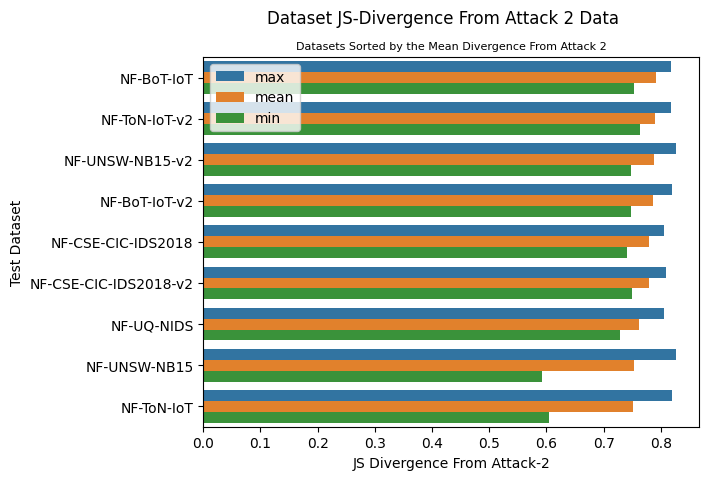

In [19]:
sns.barplot(attack_only,
            x="results",
            y = "df1",
            order = attack_only[attack_only['func'] == "mean"].sort_values('results', ascending = False).df1,
            hue = "func",
            hue_order = ['max', 'mean', 'min'])

plt.suptitle("Dataset JS-Divergence From Attack 2 Data")
plt.title("Datasets Sorted by the Mean Divergence From Attack 2", fontsize=8)
plt.xlabel("JS Divergence From Attack-2")
plt.ylabel("Test Dataset")
plt.legend(loc="upper left")

plt.savefig(fig_dir + "/raw_div_from_attack2.png")

In [20]:
lowest_values = attack_only.groupby('func')['results'].transform('min')
attack_only['min_scaled_results'] = attack_only['results'] - lowest_values
#attack_only

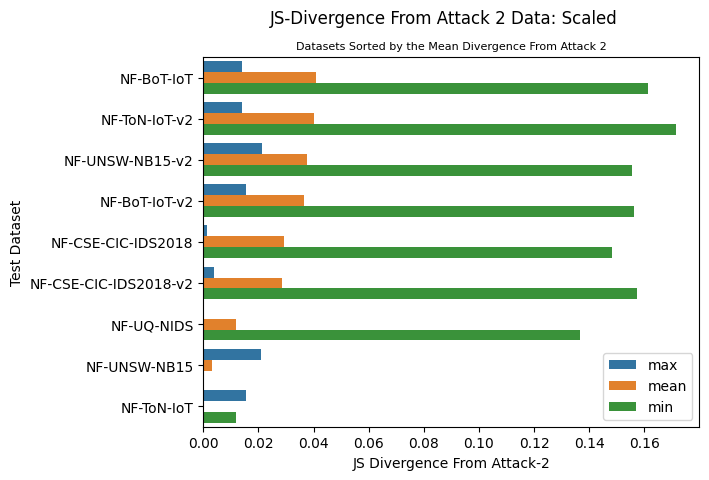

In [21]:
sns.barplot(attack_only,
            x="min_scaled_results",
            y = "df1",
            order = attack_only[attack_only['func'] == "mean"].sort_values('min_scaled_results', ascending = False).df1,
            hue = "func",
            hue_order = ['max', 'mean', 'min'])

plt.suptitle("JS-Divergence From Attack 2 Data: Scaled")
plt.title("Datasets Sorted by the Mean Divergence From Attack 2", fontsize=8)
plt.xlabel("JS Divergence From Attack-2")
plt.ylabel("Test Dataset")
plt.legend(loc="lower right")

plt.savefig(fig_dir + "/scaled_div_from_attack2.png")